In [2]:
# Setup jupyter notebook for local machine
# /home/piyush/Documents/git1/Machine-Learning-Practice/my_project_env/bin/python -m pip install --upgrade pip
# virtualenv my_project_env
# source my_project_env/bin/activate
# pip install jupyter
# jupyter notebook
# !pip install numpy
import numpy as np
# !pip install pandas
import pandas as pd
# !pip install matplotlib
import matplotlib.pyplot as plt
# !pip install -U scikit-learn
from sklearn import random_projection

**Loading Dataset**

In [3]:
from sklearn import datasets

In [36]:
digits = datasets.load_digits()

Data : (n_samples, n_features)

In [5]:
print(digits.data)
print(digits.data.shape)
print(digits.images[0])

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


Target : (n_samples)

In [6]:
print(digits.target)
print(digits.target.shape)

[0 1 2 ... 8 9 8]
(1797,)


**Learning and Predicting**

In [7]:
from sklearn import svm
from matplotlib import figure

Estimator instance

In [8]:
# Regularization parameter. The strength of the regularization is inversely proportional to C.
clf = svm.SVC(gamma=0.001, C=100.0)

Plot given data

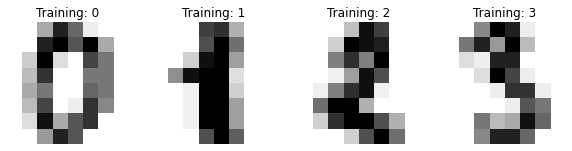

In [9]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target): # zip
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  ax.set_title('Training: %i' % label)

Learn from model using training data

In [10]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Predict new value

In [11]:
predicted = clf.predict(digits.data[-1:])

Plot predicted data

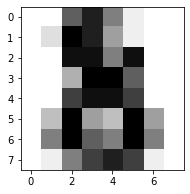

In [12]:
# f = figure.Figure(figsize=(3,3)) # use figure from matplotlib to set size of image
plt.figure(1, figsize=(3,3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest') # imshow is attribute of matplotlib.pyplot
# plt.set_title('Prediction: %i' % predicted)
plt.show()

**Type Casting**

For Regression

In [32]:
from sklearn import random_projection

Create numpy array of random decimal numbers

In [33]:
rng = np.random.RandomState(0)
X = rng.rand(10,2000)
# X
X = np.array(X, dtype='float32')
X.dtype

dtype('float32')

X is float32, which is cast to float64 by fit_transform(X) : Regression targets are cast to float64

In [34]:
# Why?
# float32 is a 32 bit number - float64 uses 64 bits. That means that float64's take up twice as much memory - and doing operations on them may be a lot slower in 
# some machine architectures. However, float64's can represent numbers much more accurately than 32 bit floats. They also allow much larger numbers to be stored.
transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X)
X_new.dtype

dtype('float64')

For Classification

In [37]:
iris = datasets.load_iris()

returns an integer array, since integer target array was used in fit

In [45]:
clf = svm.SVC()
clf.fit(iris.data[3:], iris.target[3:])
list = clf.predict(iris.data[:3])
list

array([0, 0, 0])

In [43]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

returns an string array, since string target array was used in fit

In [46]:
# clf = svm.SVC()
clf.fit(iris.data[3:], iris.target_names[iris.target[3:]])
list = clf.predict(iris.data[:3])
list

array(['setosa', 'setosa', 'setosa'], dtype='<U10')

**Refitting and updating parameters**

Calling fit() more than once will overwrite what was learned by any previous fit()

In [50]:
iris = datasets.load_iris()
clf = svm.SVC()

default kernel rbf is first changed to linear

In [52]:
clf.set_params(kernel = 'linear').fit(iris.data[3:], iris.target[3:])
predicted = clf.predict(iris.data[:3])
predicted

array([0, 0, 0])

changed back to rbf to refit the estimator

In [53]:
clf.set_params(kernel = 'rbf').fit(iris.data[3:], iris.target[3:])
predicted = clf.predict(iris.data[:3])
predicted

array([0, 0, 0])